Labels shape: (4, 1750)
Example labels: ['artifact' 'entity' 'animal' ... 'artifact' 'artifact' 'artifact']
Responses shape: (1750, 8428)
ROI names: ['Other' 'V1' 'V2' 'V3' 'V3A' 'V3B' 'V4' 'LatOcc']


Voxel counts per ROI: {np.str_('Other'): np.int64(0), np.str_('V1'): np.int64(1294), np.str_('V2'): np.int64(2083), np.str_('V3'): np.int64(1790), np.str_('V3A'): np.int64(484), np.str_('V3B'): np.int64(314), np.str_('V4'): np.int64(1535), np.str_('LatOcc'): np.int64(928)}


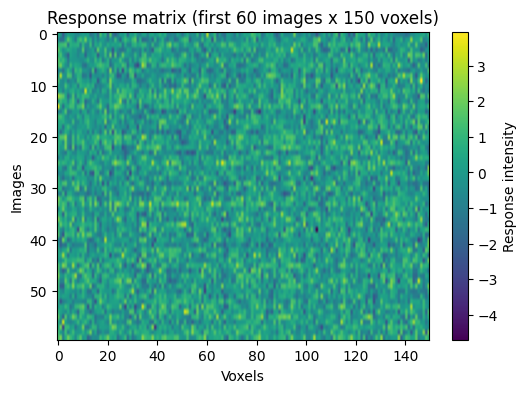

In [1]:
# ============================================
# 01_load_and_explore.ipynb
# Exploratory Data Analysis for Kay et al. (2008) dataset
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Paths
data_dir = "../data"
labels_path = os.path.join(data_dir, "kay_labels.npy")
responses_path = os.path.join(data_dir, "kay_images.npz")

# --- Load labels ---
labels = np.load(labels_path, allow_pickle=True)
print("Labels shape:", labels.shape)
print("Example labels:", labels[0])

# --- Load responses and ROI data ---
data = np.load(responses_path)
responses = data['responses']
roi = data['roi']
roi_names = data['roi_names']

print(f"Responses shape: {responses.shape}")
print(f"ROI names: {roi_names}")

# --- Show a few example images ---
images = data['stimuli'] if 'stimuli' in data.files else None
if images is not None:
    plt.figure(figsize=(8, 4))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(", ".join(labels[i]))
    plt.suptitle("Example Stimuli and Labels", fontsize=12)
    plt.show()

# --- Summary of voxel counts per ROI ---
roi_counts = {name: (roi == i).sum() for i, name in enumerate(roi_names)}
print("Voxel counts per ROI:", roi_counts)

# --- Visualize first few voxel responses ---
plt.figure(figsize=(6, 4))
plt.imshow(responses[:60, :150], aspect='auto', cmap='viridis')
plt.colorbar(label="Response intensity")
plt.title("Response matrix (first 60 images x 150 voxels)")
plt.xlabel("Voxels")
plt.ylabel("Images")
plt.show()